In [13]:
import brian2

In [14]:
DGL = '''
dv/dt = I/c - v/tau : volt
I : amp/meter**2
c : farad/meter**2
tau : second
'''
v_reset = 0 * brian2.mV
v_schwelle = 20 * brian2.mV

G = brian2.NeuronGroup(3, DGL, threshold='v>v_schwelle', reset='v=v_reset')
G.I = [1.5,3,4.5] * brian2.uA/brian2.cm2
G.tau = 10* brian2.ms 
G.c = 1* brian2.uF/brian2.cm2
G.v = 0 * brian2.mV # initial value
brian2.defaultclock.dt=0.1*brian2.ms

M = brian2.StateMonitor (G, 'v', record=True)

net = brian2.Network(G,M)
net.run( 100*brian2.ms)



INFO       No numerical integration method specified for group 'neurongroup_1', using method 'linear' (took 0.09s). [brian2.stateupdaters.base.method_choice]


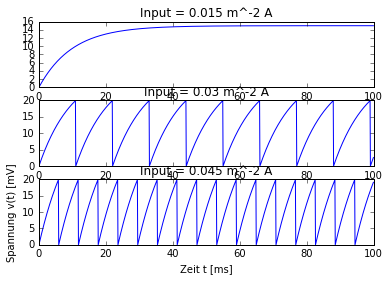

In [16]:
%matplotlib inline
import pylab, numpy
for i in [0,1,2]:
    pylab.subplot(3,1,i+1)
    pylab.title("Input = {0}".format(G.I[i]))
    pylab.plot(M.t/brian2.ms, M.v[i]/brian2.mV)
pylab.xlabel('Zeit t [ms]')
pylab.ylabel('Spannung v(t) [mV]')
